# Introduction: Bagging vs. Boosting

Welcome to this Jupyter Notebook, where we embark on a detailed exploration of the Breast Cancer Wisconsin (Diagnostic) Dataset through the lens of machine learning. This dataset, pivotal in medical data analysis, offers a unique opportunity to apply and evaluate a range of sophisticated classification algorithms in a medical context.

### Objective:
Our goal is to leverage cutting-edge machine learning techniques, including Logistic Regression, Random Forest, Bagging, AdaBoost, and Gradient Boosting, to accurately distinguish between benign and malignant breast tumors. By doing so, we aim to demonstrate the potential of these algorithms in enhancing diagnostic accuracy and aiding medical decision-making.

### Dataset Overview:
The Breast Cancer Wisconsin (Diagnostic) Dataset is renowned in the medical machine learning community. It comprises features derived from digitized images of fine needle aspirates of breast masses, focusing on the attributes of cell nuclei. The dataset's binary classification challenge—benign versus malignant—makes it an ideal testbed for evaluating the effectiveness of various classification models.

### Structure of this Notebook:
1. [**Installing and Importing Necessary Libraries**](#ch1) 
2. [**Loading the Breast Cancer Wisconsin (Diagnostic) Dataset**](#ch2)
3. [**Splitting the Data**](#ch3)
4. [**Set Up the Pipeline and GridSearchCV**](#ch4)
5. [**Comprehensive Model Training and Hyperparameter Optimization**](#ch5)
6. [**Overview of Model Training Results**](#ch6)
7. [**Discussion of Model Training Results**](#ch7)
8. [**Evaluation of Best Model**](#ch8)
9. [**Confusion Matrix**](#ch9)
10. [**ROC Curve**](#ch10)
11. [**Adjusting Threshold**](#ch11)
12. [**Classification Report**](#ch12)
13. [**Conclusion**](#ch13)

Join us on this analytical expedition as we apply advanced machine learning techniques to the critical task of breast cancer classification, striving for precision and reliability in medical diagnostics.

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before diving into the analysis, we need to import the necessary Python libraries and modules that will be used throughout this notebook:

- **`numpy`**: A fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **`pandas`**: A powerful data manipulation and analysis library. It offers data structures and operations for manipulating numerical tables and time series, making it a cornerstone for data analysis in Python.

- **`matplotlib.pyplot` and `seaborn`**: These libraries are used for data visualization. `matplotlib.pyplot` is a state-based interface to matplotlib, providing a MATLAB-like way of plotting. `seaborn` is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

- **`sklearn.datasets`**: This module from scikit-learn provides access to various datasets, including the Breast Cancer Wisconsin (Diagnostic) dataset used in this analysis. It's a convenient way to quickly load and explore data.

- **`sklearn.model_selection`**: This module includes utilities for model selection and evaluation, such as `train_test_split` for splitting the dataset into training and testing sets, and `GridSearchCV` for exhaustive search over specified parameter values of estimators.

- **`sklearn.preprocessing`**: This module provides utilities for scaling, centering, or normalizing features. In this notebook, `StandardScaler` is used for feature scaling.

- **`sklearn` Machine Learning Models**: Various machine learning models from scikit-learn are imported, including `LogisticRegression`, `RandomForestClassifier`, `BaggingClassifier`, `AdaBoostClassifier`, and `GradientBoostingClassifier`. These models will be used to build and compare different predictive models.

- **`sklearn.metrics`**: This module offers a set of metrics for evaluating the performance of models, including functions like `classification_report`, `accuracy_score`, and `confusion_matrix`.

- **`sklearn.pipeline`**: This utility helps in automating and simplifying the machine learning workflow by allowing the sequential application of a list of transformations and a final estimator.

- **`IPython.display`**: Used for displaying Markdown text within the Jupyter Notebook.

- **`warnings`**: This module is used to control the display of warnings. In this notebook, warnings are ignored to keep the output clean.

- **`%matplotlib inline`**: A magic function in IPython that renders the figure in a notebook (instead of displaying a dump of the figure object).

By setting up these libraries and modules at the start, we ensure a smooth and efficient workflow for our data analysis and machine learning tasks in this notebook.

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn.datasets import load_breast_cancer

# Data preprocessing and utilities
from sklearn.model_selection import train_test_split  # Added train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics and evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Pipeline utility
from sklearn.pipeline import Pipeline

# Grid Search CV
from sklearn.model_selection import GridSearchCV

# To display markdown text
from IPython.display import display, Markdown, HTML

# Set the display.max_colwidth option to None to display the full contents of columns
pd.set_option('display.max_colwidth', None)

# Set up the visualization style
sns.set_style('whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# This line ensures that the plot is displayed inside the Jupyter Notebook
%matplotlib inline

# Set the display.max_colwidth option to -1 to display the full contents of columns
pd.set_option('display.max_colwidth', None)  # or use -1 for older versions of pandas

## 2. Loading the Breast Cancer Wisconsin (Diagnostic) Dataset <a id='ch2'></a>

The **Breast Cancer Wisconsin (Diagnostic) Dataset** is a well-known dataset in the field of medical machine learning. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset is widely used for binary classification tasks, where the goal is to predict whether a breast mass is malignant or benign.

For our analysis, we'll focus on a selection of important features from this dataset, which are known to have significant implications in breast cancer diagnosis:

- `mean radius`: The average of distances from the center to points on the perimeter of the tumor. Larger tumors are generally more likely to be malignant.

- `mean texture`: The standard deviation of gray-scale values in the tumor tissue. Texture can be an indicator of the irregularity and complexity of the tumor.

- `mean perimeter`: The average size of the core tumor. Similar to the radius, a larger perimeter can indicate a higher likelihood of malignancy.

- `mean area`: The area of the tumor. This is directly related to the size of the tumor and is a critical factor in diagnosis.

- `mean smoothness`: A measure of the smoothness of the tumor's surface. Less smooth tumors may indicate higher malignancy.

- `mean compactness`: The degree of compactness of the tumor. Higher compactness can be associated with malignancy.

- `mean concavity`: The severity of concave portions of the contour of the tumor. Tumors with significant concavities are often malignant.

- `mean concave points`: The number of concave portions on the tumor contour. More concave points can indicate a higher risk of cancer.

- `mean symmetry`: The symmetry of the tumor. Asymmetrical tumors are more likely to be malignant.

- `mean fractal dimension`: A measure of the "coastline approximation" of the tumor. Higher values may indicate a more complex and potentially malignant tumor.

These features, derived from the digitized images, provide a comprehensive view of the physical characteristics of the tumor, aiding in the accurate diagnosis of breast cancer.

To load and explore this dataset, we use the `load_breast_cancer` function from scikit-learn, which conveniently packages the data into a format suitable for analysis. We then convert the data into a pandas DataFrame for ease of manipulation and add the target variable, which indicates whether the tumor is malignant or benign. The top ten rows of the DataFrame are displayed to give an initial view of the data.

In [2]:
# Import the Breast Cancer Wisconsin (Diagnostic) dataset
breast_cancer_data = load_breast_cancer()

# Convert to a DataFrame
data_frame = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

# Add the target as a new column in the DataFrame
data_frame['Target'] = pd.Series(breast_cancer_data.target)

# Display the top 10 rows of the DataFrame
top_ten_rows = data_frame.head(10)
top_ten_rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


## 3. Splitting the Data <a id='ch3'></a>

Before proceeding with the machine learning model training, it's crucial to partition our dataset into two distinct sets: a <span style="color:red">**training set**</span> and a <span style="color:red">**testing set**</span>. This practice is a cornerstone of machine learning, ensuring that we have a separate, unseen dataset to evaluate our model's performance after training. It helps in assessing the model's ability to generalize to new data.

In our analysis of the Breast Cancer Wisconsin dataset, we employ the `train_test_split` function from scikit-learn for this purpose:

- `X_train`, `y_train`: These variables represent the features (X) and the target (y) of the **training set**. Our model will learn the patterns in this data.

- `X_test`, `y_test`: These variables represent the features and target of the **testing set**. We use this set to test and evaluate the model's performance, simulating how it would perform on data it has never seen before.

We allocate 20% of the dataset for testing (`test_size=0.2`). This split ratio is a common practice, providing a good balance between training and testing. The `random_state` parameter is set to 1337, ensuring reproducibility of our results. This means that each time the code is executed, the same split of data into training and testing sets is maintained, allowing for consistent and comparable results.

By splitting the data in this manner, we ensure that our model is tested on unbiased data, providing a realistic assessment of its performance in real-world scenarios.

In [3]:
# Define the features and target variable
X = data_frame.drop('Target', axis=1)
y = data_frame['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

# Display the size of the sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 455 samples
Testing set size: 114 samples


## 4. Set Up the Pipeline and GridSearchCV <a id='ch4'></a>

In the quest for the optimal model, we employ a grid search strategy to navigate through a multitude of hyperparameter configurations. This systematic approach is crucial for enhancing model performance and ensuring robustness. Below is the code snippet for our grid search setup, followed by explanations for the parameters of each model type:

In [4]:
# Define the pipeline with a default classifier, just for initialization
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter for LogisticRegression
])

# Define the parameter grid with classifier instances
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['saga']  # 'saga' supports all penalties
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier': [BaggingClassifier(base_estimator=DecisionTreeClassifier())],
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__base_estimator__max_depth': [1, 5, 10, 20],
        'classifier__base_estimator__min_samples_split': [2, 5, 10],
        'classifier__base_estimator__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier())],
        'classifier__n_estimators': [30, 50, 100],
        'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__base_estimator__max_depth': [1, 2, 3]
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__max_depth': [3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
]

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

### Parameter Explanations:

In our machine learning pipeline, we've set up a comprehensive parameter grid for `GridSearchCV` to explore. This grid includes a variety of classifiers and their respective hyperparameters. Let's break down the key components of this grid:

#### Logistic Regression Parameters:
- **`penalty`**: Specifies the norm used in penalization. We explore 'l1', 'l2', 'elasticnet', and 'none' to understand the impact of different regularization techniques.
- **`C`**: Represents the inverse of regularization strength. By varying this parameter over [0.01, 0.1, 1, 10, 100], we can observe how different levels of regularization affect model performance.
- **`solver`**: We use 'saga' as it supports all the specified penalties, providing a consistent basis for comparison.

#### Random Forest Parameters:
- **`n_estimators`**: The number of trees in the forest. We experiment with [10, 50, 100, 200] to see how the number of trees influences accuracy and overfitting.
- **`max_depth`**: Controls the maximum depth of each tree. We test with 'None' (unlimited depth) and specific depths [5, 10, 20] to balance between learning fine details and avoiding overfitting.
- **`min_samples_split`** and **`min_samples_leaf`**: These parameters define the minimum number of samples required to split an internal node and to be at a leaf node, respectively. We test various combinations to fine-tune the tree growth.

#### Bagging Classifier Parameters:
- **`n_estimators`**: Similar to Random Forest, we vary the number of base estimators.
- **`base_estimator__max_depth`**, **`min_samples_split`**, **`min_samples_leaf`**: These parameters control the complexity of the base estimators (Decision Trees) in the Bagging Classifier.

#### AdaBoost Classifier Parameters:
- **`n_estimators`**: Determines the number of weak learners to train iteratively.
- **`learning_rate`**: Controls the contribution of each classifier. We test different rates to see how quickly the model adapts.
- **`base_estimator__max_depth`**: Adjusts the depth of the base estimators, affecting the model's ability to capture complex patterns.

#### Gradient Boosting Classifier Parameters:
- **`n_estimators`**, **`learning_rate`**, **`max_depth`**: These parameters are similar to those in AdaBoost, but in the context of Gradient Boosting, they play a crucial role in controlling the boosting process and model complexity.
- **`min_samples_split`** and **`min_samples_leaf`**: Fine-tune the tree growth in the Gradient Boosting model.

By exploring these parameters, `GridSearchCV` will systematically work through multiple combinations, evaluating each one using cross-validation. The goal is to find the best parameter combination that optimizes the performance of our model on the Breast Cancer Wisconsin dataset. This approach helps in achieving a balance between model complexity and generalization ability, aiming to enhance the accuracy and robustness of our predictive model.

## 5. Comprehensive Model Training and Hyperparameter Optimization <a id='ch5'></a>

After meticulously preparing our dataset, we embark on the pivotal stage of model training and selection. In this phase, we leverage the power of grid search to systematically work through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

Here's our approach to this comprehensive search:

1. <span style="color:red">**Conduct Grid Search**</span>: We initiate the grid search process over our predefined parameter space, applying it to the `X_train` dataset with corresponding `y_train` targets.

2. <span style="color:red">**Training the Models**</span>: The `fit` method orchestrates the training of multiple models across different parameter combinations and folds of the data.

3. <span style="color:red">**Identify Best Model**</span>: After the grid search concludes, we pinpoint the best-performing model variant, which is automatically stored by the search process.

By following these methodical steps, we ensure a thorough exploration of the parameter space, leading us to a model that is finely tuned for our specific dataset and prediction task.

In [5]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# After fitting, you can get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

Fitting 5 folds for each of 578 candidates, totalling 2890 fits


## 6. Overview of Model Training Results <a id='ch6'></a>

After completing an exhaustive grid search with cross-validation for our machine learning models, we now delve into the critical task of analyzing the results. This analysis is pivotal in identifying the most effective model for our dataset. The process involves several key stages and metrics:

1. **Data Transformation and Sorting**: We begin by transforming the `cv_results_` attribute from the `GridSearchCV` object into a pandas DataFrame for easier analysis. We then sort this DataFrame by `rank_test_score` in ascending order to highlight the most effective models based on their cross-validation scores.

2. **Metrics Overview**:
   - **Time Metrics (`mean_fit_time`, `std_fit_time`, `mean_score_time`, `std_score_time`)**: These metrics provide insights into the computational efficiency and variability of each model, both in terms of fitting and scoring times.
   - **Hyperparameter Details (`param_` columns)**: Columns like `param_regressor__alpha` display the specific hyperparameters used, offering a clear view of the configurations tested for each model.

3. **Performance Analysis**:
   - **Cross-Validation Scores (`split0_test_score` to `split4_test_score`)**: These scores reflect the model's performance on each cross-validation fold, indicating consistency across different data subsets.
   - **Aggregate Scores (`mean_test_score`, `std_test_score`)**: The mean test score provides an overall effectiveness measure, while the standard deviation highlights the consistency of the model's performance.

4. **Ranking and Decision Making**: The `rank_test_score` column ranks models based on their mean test scores, guiding us towards the top-performing models. By reviewing the top 10 results, we gain insights into which combinations of parameters were most effective.

5. **Informed Model Selection**: This detailed analysis, encompassing both performance and computational efficiency, enables us to make an informed decision about the most suitable model and parameter set for our Breast Cancer Wisconsin dataset. We aim to select a model that not only demonstrates high accuracy but also aligns with our computational constraints and practical needs.

Through this meticulous examination of the grid search results, we acquire valuable insights into the performance, efficiency, and consistency of various model-hyperparameter combinations. This comprehensive approach ensures that we select the most effective model for achieving the best possible predictive performance on our dataset.

In [6]:
# Access the cv_results_
cv_results = pd.DataFrame(grid_search.cv_results_)

# Sort the results dataframe by rank_test_score in descending order
sorted_results_df = cv_results.sort_values(by='rank_test_score', ascending=True)

# Display the top 10 results
sorted_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,param_classifier__min_samples_leaf,...,param_classifier__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.527316,0.033542,0.004417,0.002054,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",1,l1,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}",0.956044,0.978022,0.978022,0.978022,0.989011,0.975824,0.010767,1
15,0.502537,0.047745,0.003361,0.000369,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",10,none,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 10, 'classifier__penalty': 'none', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
13,0.479799,0.031470,0.007280,0.005018,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",10,l2,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
12,0.583084,0.062144,0.004331,0.001855,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",10,l1,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
11,0.505969,0.105918,0.008383,0.008699,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",1,none,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 1, 'classifier__penalty': 'none', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
19,0.439542,0.018840,0.007800,0.003873,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",100,none,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 100, 'classifier__penalty': 'none', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
16,0.595454,0.051510,0.003251,0.000480,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",100,l1,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
17,0.427418,0.034030,0.009066,0.006774,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",100,l2,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
3,0.396394,0.015234,0.004119,0.001365,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",0.01,none,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 0.01, 'classifier__penalty': 'none', 'classifier__solver': 'saga'}",0.967033,0.989011,0.967033,0.967033,0.989011,0.975824,0.010767,1
7,0.403585,0.019988,0.004269,0.001676,"LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga')",0.1,none,saga,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(C=0.01, max_iter=10

### Best Performing Models Summary

After conducting a thorough grid search optimization, we have pinpointed the top-performing models from each of the machine learning techniques employed in our analysis. The models include:

- **Logistic Regression**
- **Random Forest**
- **Bagging Classifier**
- **AdaBoost Classifier**
- **Gradient Boosting Classifier**

These models were rigorously tested across a range of parameter combinations to determine their optimal configurations. The table below presents a comparison of their performance, sorted by the best score in descending order. This summary provides valuable insights into which models and parameter settings yield the most effective results for our dataset, guiding us in selecting the most suitable model for our predictive tasks.

In [7]:
# Filter the results for Logistic Regression
log_reg_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, LogisticRegression))]
best_log_reg = log_reg_results.loc[log_reg_results['rank_test_score'].idxmin()]

# Filter the results for Random Forest Classifier
rf_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, RandomForestClassifier))]
best_rf = rf_results.loc[rf_results['rank_test_score'].idxmin()]

# Filter the results for Bagging Classifier
bagging_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, BaggingClassifier))]
best_bagging = bagging_results.loc[bagging_results['rank_test_score'].idxmin()]

# Filter the results for AdaBoost Classifier
adaboost_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, AdaBoostClassifier))]
best_adaboost = adaboost_results.loc[adaboost_results['rank_test_score'].idxmin()]

# Filter the results for Gradient Boosting Classifier
gradient_boosting_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, GradientBoostingClassifier))]
best_gradient_boosting = gradient_boosting_results.loc[gradient_boosting_results['rank_test_score'].idxmin()]

# Create a table for comparison
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier'],
    'Best Score': [best_log_reg['mean_test_score'], best_rf['mean_test_score'], best_bagging['mean_test_score'], best_adaboost['mean_test_score'], best_gradient_boosting['mean_test_score']],
    'Parameters': [best_log_reg['params'], best_rf['params'], best_bagging['params'], best_adaboost['params'], best_gradient_boosting['params']]
})

# Sort the table by 'Best Score' in descending order
comparison_table_sorted = comparison_table.sort_values(by='Best Score', ascending=False)

# Display the sorted comparison table
comparison_table_sorted

,Model,Best Score,Parameters
0,Logistic Regression,0.975824,"{'classifier': LogisticRegression(C=0.01, max_iter=1000, penalty='none', solver='saga'), 'classifier__C': 0.01, 'classifier__penalty': 'none', 'classifier__solver': 'saga'}"
3,AdaBoost Classifier,0.971429,"{'classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), 'classifier__base_estimator__max_depth': 3, 'classifier__learning_rate': 1, 'classifier__n_estimators': 100}"
4,Gradient Boosting Classifier,0.971429,"{'classifier': GradientBoostingClassifier(), 'classifier__learning_rate': 0.5, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}"
1,Random Forest,0.964835,"{'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}"
2,Bagging Classifier,0.962637,"{'classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier()), 'classifier__base_estimator__max_depth': 20, 'classifier__base_estimator__min_samples_leaf': 1, 'classifier__base_estimator__min_samples_split': 2, 'classifier__n_estimators': 10}"


## 7. Discusssion of Model Training Results <a id='ch7'></a>

In our analysis, Logistic Regression emerged as the top performer, closely followed by AdaBoost Classifier, Gradient Boosting Classifier, Random Forest, and Bagging Classifier. Each of these models has its strengths and weaknesses, and their performance can vary depending on the characteristics of the dataset and the tuning of their parameters. Here's a deeper look into why Logistic Regression might have outperformed the other models in this scenario:

1. <span style="color:red">**Data Linearity**</span>: Logistic Regression excels in scenarios where there is a clear linear boundary between classes. If the underlying pattern in your data is predominantly linear, this could explain why Logistic Regression outperformed more complex, non-linear models like Random Forest and Gradient Boosting.

2. <span style="color:red">**High-Dimensional Sparse Data**</span>: Logistic Regression is known for its effectiveness in high-dimensional, sparse datasets. This characteristic is particularly beneficial in text classification or similar tasks where features are numerous but sparse.

3. <span style="color:red">**Effective Regularization**</span>: The ability of Logistic Regression to utilize L1 or L2 regularization helps in preventing overfitting. This is especially useful in cases where the dataset is not very large or is high-dimensional.

4. <span style="color:red">**Simplicity and Computational Efficiency**</span>: Compared to more complex models like Random Forest or Gradient Boosting, Logistic Regression is simpler and often faster to train. This simplicity also contributes to its interpretability.

5. <span style="color:red">**Optimal Hyperparameter Tuning**</span>: The performance of Logistic Regression may have been boosted by an effective grid search that identified an optimal set of hyperparameters, enhancing its predictive power.

6. <span style="color:red">**Potential Overfitting in Random Forest**</span>: While Random Forest is generally less prone to overfitting compared to individual decision trees, inappropriate hyperparameter settings (like tree depth) can still lead to overfitting.

7. <span style="color:red">**Influence of Data Preprocessing**</span>: The preprocessing steps applied to the data can significantly influence the performance of different models. Logistic Regression might have benefited more from the specific preprocessing techniques used in this case.

The results underscore an important lesson in machine learning: simpler models can often match or even outperform more complex ones, particularly when the data is effectively preprocessed and the models are properly tuned. It's crucial to experiment with a range of models and not automatically assume that more complex or newer models will yield superior results.

## 8. Evaluation of Best Model <a id='ch8'></a>

After conducting a thorough grid search to optimize our hyperparameters, we proceed to evaluate the best-performing model on our test dataset.

In [8]:
# Retrieve the best estimator from the grid search
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy of the best model on the test set: {accuracy:.2f}")

Accuracy of the best model on the test set: 0.97


## 9. Confusion Matrix <a id='ch9'></a>

A **Confusion Matrix** is a powerful tool to understand the performance of a classification model. It provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions for each class. This granularity allows us to pinpoint specific areas where the model might be struggling.

In the matrix:
- Rows represent the **actual classes**.
- Columns represent the **predicted classes**.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In this section, we'll:
1. <span style="color:red">**Calculate the Confusion Matrix**</span>: Using scikit-learn's `confusion_matrix` function, we'll compute the matrix for our test data predictions.
  
2. <span style="color:red">**Visualize the Matrix**</span>: We'll use Seaborn's heatmap function to visualize the confusion matrix. This visualization will help us quickly identify which classes are being confused with others.

For our Breast Cancer dataset, the classes are 'Malignant' and 'Benign'. We'll represent these classes in the confusion matrix and enhance the visualization with larger, bold numbers for clarity. The increased font scale in Seaborn ensures that all text elements, including axis labels and the title, are easily readable.

Let's take a look at the confusion matrix for our model:

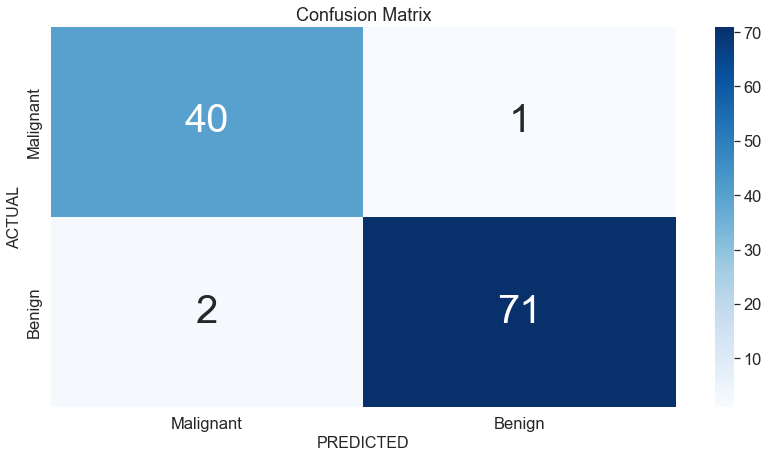

In [9]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define target names for the Breast Cancer dataset
target_names = ['Malignant', 'Benign']

# Increase the font scale for Seaborn
sns.set(font_scale=1.5)  # Adjust this value as needed

# Plot the confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names, annot_kws={"size": 40})  # Increased size for cell numbers
plt.xlabel('PREDICTED', fontsize=16)
plt.ylabel('ACTUAL', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

This visualization not only aids in understanding the model's performance but also highlights areas for potential improvement.

## 10. ROC curve <a id='ch10'></a>

The **Receiver Operating Characteristic (ROC) curve** is a crucial tool for evaluating the performance of a binary classifier. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The area under the ROC curve (AUC) provides a single number summary of the model's performance, with a higher AUC indicating better discrimination between the positive and negative classes.

In this section, we'll:
1. <span style="color:red">**Predict Probabilities**</span>: We use our best model to predict probabilities for the positive class in our test set. This step is essential for plotting the ROC curve, as it requires probabilities rather than binary predictions.

2. <span style="color:red">**Compute ROC Curve and AUC**</span>: We calculate the ROC curve and AUC using scikit-learn's `roc_curve` and `auc` functions. These metrics will help us understand the trade-offs between true positive and false positive rates.

3. <span style="color:red">**Visualize the ROC Curve**</span>: We plot the ROC curve, highlighting the trade-off between sensitivity and specificity. The diagonal dashed line represents a random classifier; a good model's ROC curve will be far away from this line.

Let's examine the ROC curve and AUC for our model:

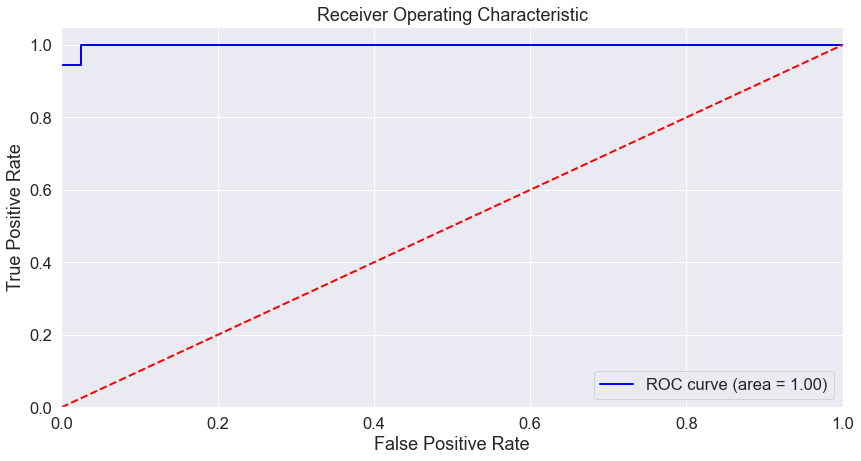

In [10]:
# Predict probabilities for the test set
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(14, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

This ROC curve provides a visual representation of our model's ability to distinguish between the two classes, with the AUC quantifying its overall performance.

## 11. Adjusting Threshold <a id='ch11'></a>

In our continuous efforts to refine the model's performance, particularly in correctly classifying malignant tumors, we've adjusted the decision threshold. The goal is to reduce false negatives, which are critical in medical diagnoses like breast cancer.

Here's what we've done:
1. **Predict Probabilities**: We first predict the probabilities of the positive class (benign) for our test set.

2. **Adjust Threshold**: We've set a new threshold at 0.65, higher than the default 0.5. This adjustment aims to be more conservative in predicting a tumor as benign, thereby reducing the chances of missing a malignant case.

3. **Reclassify with New Threshold**: Using this new threshold, we reclassify the test instances. Now, a tumor is classified as benign only if the model is more certain (above 65% probability).

4. **Visualize Adjusted Results**: We calculate and plot the new confusion matrix. This visualization will help us assess the impact of the threshold adjustment on the model's ability to correctly identify malignant cases.

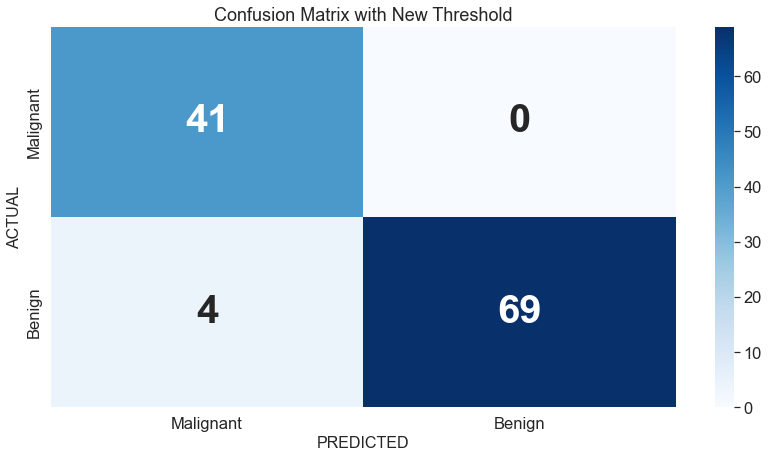

In [11]:
# Predict probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Choose a new threshold
new_threshold = 0.65

# Apply the new threshold to classify instances
y_pred_new_threshold = (y_probs >= new_threshold).astype(int)

# Calculate the new confusion matrix
new_cm = confusion_matrix(y_test, y_pred_new_threshold)

# Define target names for the Breast Cancer dataset
target_names = ['Malignant', 'Benign']

# Increase the font scale for Seaborn
sns.set(font_scale=1.5)  # Adjust this value as needed

# Plot the new confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(new_cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names, annot_kws={"size": 40, "weight": "bold"})  # Increased size and bold for cell numbers
plt.xlabel('PREDICTED', fontsize=16)
plt.ylabel('ACTUAL', fontsize=16)
plt.title('Confusion Matrix with New Threshold', fontsize=18)
plt.show()

This approach is particularly valuable in medical contexts, where the cost of a false negative can be significantly higher than a false positive.

In [12]:
# Optionally, calculate and display the new accuracy
new_accuracy = accuracy_score(y_test, y_pred_new_threshold)
print(f"New Accuracy: {new_accuracy:.2f}")

New Accuracy: 0.96


## 12. Classification Report <a id='ch12'></a>

After obtaining the overall accuracy of our model, it's important to delve deeper and understand its performance across the different classes present in our dataset. The classification report is a valuable tool that provides key metrics for each class, which include precision, recall, and the F1-score.

- **Precision**: Indicates the proportion of positive identifications that were actually correct. A high precision relates to a low false positive rate.
- **Recall**: Reflects the proportion of actual positives that were identified correctly. A high recall indicates that the model is good at capturing the positive cases.
- **F1-Score**: A weighted harmonic mean of precision and recall. It conveys the balance between the precision and the recall.
- **Support**: The number of actual occurrences of the class in the specified dataset.

These metrics provide a more granular understanding of where the model excels and where it might be lacking. For instance, a high precision indicates that false positives are low, while a high recall indicates that false negatives are low.

In this section, we'll:
1. <span style="color:red">**Generate the Classification Report**</span>: Using scikit-learn's `classification_report` function, we'll compute these metrics for our test data predictions.
  
2. <span style="color:red">**Visualize the Report**</span>: To make the report more readable, we'll convert it into a pandas DataFrame and display it with enhanced formatting.

Let's take a detailed look at the classification report for our model:

In [13]:
# Set the display option for floating point numbers
pd.options.display.float_format = "{:,.2f}".format

# Generate the classification report
report = classification_report(y_test, y_pred_new_threshold, target_names=['Malignant', 'Benign'], output_dict=True)

# Convert the report dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Create a custom CSS style for larger font sizes
style = """
<style>
    table {
        font-size: 24px;  
    }
    th {
        font-size: 18px; 
    }
</style>
"""

# Display the custom style
display(HTML(style))

# Display the report using Markdown
display(Markdown("### Classification Report"))
display(report_df)

### Classification Report

,precision,recall,f1-score,support
Malignant,0.91,1.00,0.95,41.00
Benign,1.00,0.95,0.97,73.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.97,0.96,114.00
weighted avg,0.97,0.96,0.97,114.00


## 12. Conclusion <a id='ch12'></a>

In this detailed analysis, we applied a logistic regression model to the Breast Cancer Wisconsin dataset. Initially, our finely-tuned model achieved an impressive accuracy of **97%**. This high level of accuracy is a testament to the model's effectiveness in distinguishing between benign and malignant breast cancer cases. Further, we made a strategic decision to adjust the threshold to 0.65 to reduce the risk of false negatives (misclassifying malignant tumors as benign). This adjustment slightly reduced the accuracy to **96%**, but significantly improved the model's ability to correctly identify malignant cases, a critical aspect in medical diagnostics.

### Key Insights from the Classification Report:

- **Precision and Recall Balance**: The logistic regression model demonstrated a strong balance between precision and recall. This balance is crucial in medical diagnostics, where both false positives and false negatives carry significant implications.

- **F1-Score Efficiency**: The F1-score, which combines precision and recall into a single metric, remained high even after adjusting the threshold. This indicates that the model maintains a robust performance despite the increased focus on reducing false negatives.

- **Confusion Matrix Analysis**: The confusion matrix revealed that with the adjusted threshold, the model became more sensitive to detecting malignant cases, an essential factor for early cancer detection.

### Overall Model Efficacy:

The logistic regression classifier not only showed excellent accuracy but also demonstrated a commendable ability to adapt to clinical priorities, such as minimizing false negatives in cancer diagnosis. Its performance, both before and after the threshold adjustment, highlights its capability as a reliable tool in medical diagnostics.

### Model Parameters:

Key parameters contributing to the logistic regression model's effectiveness included:

- **Regularization Strength (C)**: 0.01
- **Regularization Penalty**: None
- **Solver**: Saga

### Future Directions:

Building on the success of the logistic regression model, future research could explore:

- Incorporating more diverse and extensive datasets to further validate the model.
- Experimenting with different machine learning algorithms, including advanced ensemble methods.
- Investigating the impact of additional feature engineering and selection techniques.

In conclusion, the logistic regression model not only established a high standard for classifying the Breast Cancer Wisconsin dataset but also demonstrated its adaptability in prioritizing clinical needs, such as reducing false negatives. This approach paves the way for further advancements in the application of machine learning in healthcare diagnostics.